# GCP Model Connection Test

### Sends a JSON request to the AI Platform Prediction model API and interprets the Response

In [1]:
# Imports
from os import path, environ
from numpy import argmax, array
from googleapiclient import discovery
from PIL import Image

In [2]:
# Constants
TEST_PIC_DIR = path.join('apple.jpg')
AUTH_FILE_DIR = path.join('auth.json')
PROJECT_ID = "know-your-fruit-283323"
MODEL_NAME = "prod"
VERSION_NUM = "v6"
CLASS_NAMES = ['Apple', 'Avocado', 'Avocado-cut', 'Banana', 'Bell Peppers', 'Blackberries', 'Blueberries', 'Cherries (Sweet)',
    'Coconut', 'Cucumber','Cucumber-cut', 'Grapes', 'Kiwifruit', 'Kiwifruit-cut', 'Lemon', 'Lime', 'Lychee', 'Mango', 'Honeydew Melon',
    'Orange','Orange-cut',' Papaya','Papaya-cut', 'Peach', 'Pear','Pineapple', 'Plum','Pomegranate','Pomegranate-cut', 'Raspberries',
    'Strawberries', 'Tomato', 'Watermelon', 'Watermelon-cut']

In [3]:
# Call this to get predictions
def predict_json(project, model, instances, version=None):
    service = discovery.build('ml', 'v1')
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()

    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']

# Set the environment variable to the auth file
environ['GOOGLE_APPLICATION_CREDENTIALS'] = AUTH_FILE_DIR

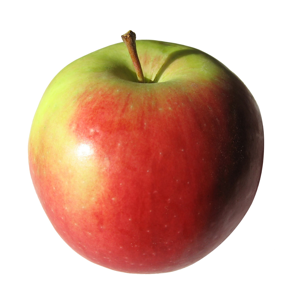

In [4]:
# encoding output
img = Image.open(TEST_PIC_DIR).resize((299,299))
img

In [5]:
in_img = array(img).reshape(1, 299, 299, 3).tolist()
in_img

[[[[255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],
   [255, 255, 255],


In [6]:
# Use the Google API to call the model
predictions = predict_json(PROJECT_ID, MODEL_NAME, in_img, version=VERSION_NUM)
predictions

[{'sequential': [0.9999951124191284,
   1.2179915742649428e-08,
   1.782102937442076e-11,
   1.078353961680989e-09,
   7.864747431085561e-07,
   2.2420845624537833e-08,
   1.0096926850167165e-08,
   2.636098095365469e-08,
   1.0314867016081308e-11,
   3.551163486534281e-12,
   1.9609854105123725e-12,
   3.800699630573945e-07,
   1.3007547004838336e-14,
   2.332794624138046e-09,
   3.2568017727108156e-10,
   1.7079798908525845e-08,
   1.9890069591355086e-09,
   1.6113522738336883e-09,
   8.527793055046473e-11,
   7.188161524340764e-12,
   4.7329410356178325e-12,
   3.5538247149767555e-13,
   8.73211279759506e-13,
   4.1096930658568454e-07,
   1.115635541282245e-06,
   3.8466926584150574e-13,
   4.021638577711428e-09,
   3.4381333335886666e-08,
   7.039203941960892e-11,
   4.228540717576834e-08,
   1.2934638082828798e-10,
   1.9751789750444004e-06,
   8.251153649219134e-10,
   3.109277375498709e-12]}]

In [7]:
# Print the result
CLASS_NAMES[argmax(predictions[0]['sequential'])]

'Apple'